#### A. High level description of the data and some pre-processing

1) How many genes profiled? 

2) How many samples (subjects/patients) in total?

3) How many samples in each class?

4) If there are missing values, then remove the entire row 
(gene) from the data matrix.
How many rows left now?

5) Pick 20 genes at random. Draw 20 pair boxplots in one 
figure comparing expression levels of each of these genes 
in the two classes M and H.

In [1]:
import random
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

raw_data = pd.read_csv('AMI_GSE66360_series_matrix.csv', skiprows=58, header=None,encoding="ISO-8859-1", low_memory=False)
data = raw_data.T
data.columns = data.iloc[0]
data = data[1:]
data = data.dropna(axis=1, how='any')
data.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067


Number of total genes profiled: 54675
Number of subjects profiled: 99
Number of healthy samples : 50
Number of  acute myocardial infraction samples: 49
Number of genes profiled after dropping missing values: 54628


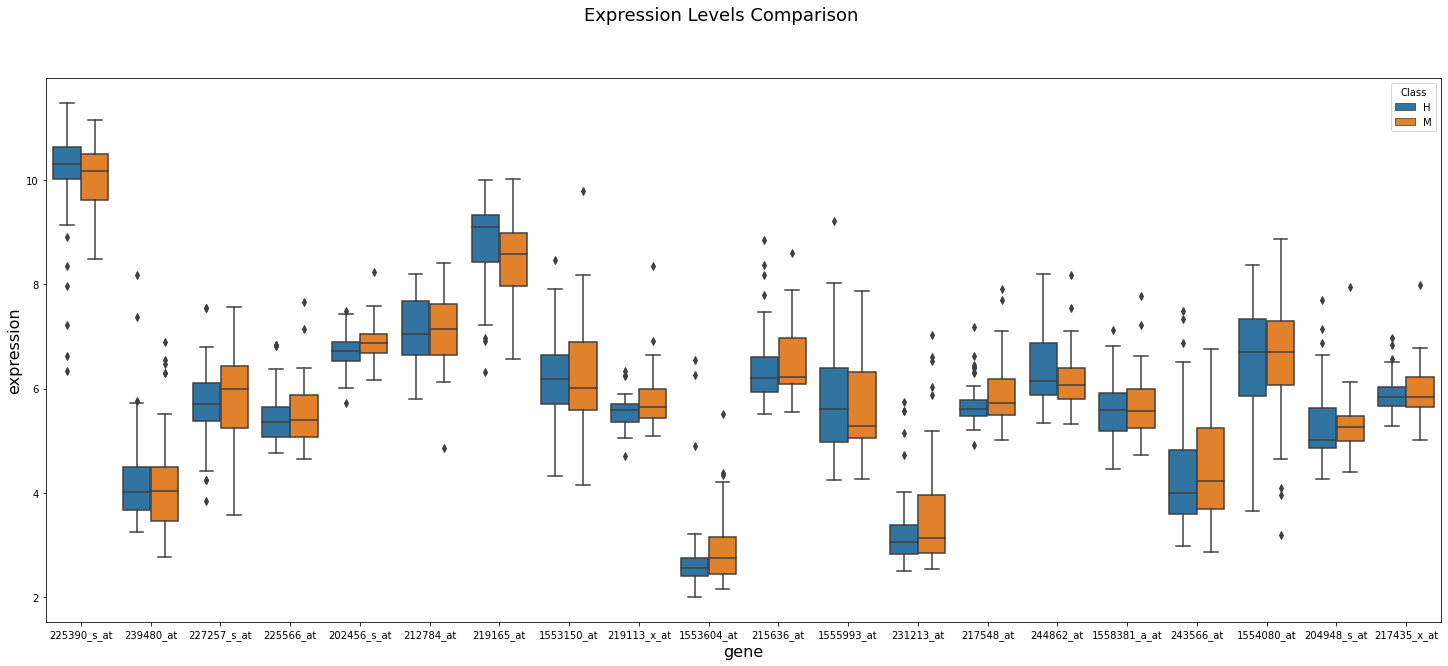

In [2]:
genes = len(data.iloc[0])-2
df_h = data.loc[data['Class']=='H']
df_m = data.loc[data['Class']=='M']
print("Number of total genes profiled: {}".format(len(raw_data.T.iloc[0])-3))
print("Number of subjects profiled: {}".format(len(data['Class'])))
print("Number of healthy samples : {}".format(len(df_h)))
print("Number of  acute myocardial infraction samples: {}".format(len(df_m)))
print("Number of genes profiled after dropping missing values: {}".format(genes))

def PlotGenesExpresionLevel(genes):
    frames = []
    for i in genes:
        frame = pd.DataFrame({'gene' : [data.columns[i] for j in range(99)],
                              'expression' : data.iloc[:,i].to_numpy().astype(float),
                              'Class' : data.iloc[:,0]})
        frames.append(frame.copy())
    df_melted = pd.concat(frames)
    fig, ax = plt.subplots(figsize=(25,10)) 
    fig.suptitle('Expression Levels Comparison', fontsize=18)
    ax = sns.boxplot(x="gene", y="expression", hue="Class", data=df_melted)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    plt.show()
    
rand_genes = [random.randint(2,54630) for i in range(20)]
PlotGenesExpresionLevel(rand_genes)

####  B. WRS for differential expression (DE)

1) Consider some gene, g. Under the null model (which assumes that 
for g there is no M vs H DE), what is the expected sum of ranks of 
g’s expression levels measured for samples labeled M?

2) Denote this sum of ranks by RS(g). What is the maximal value, c, 
that RS(g) can take?

3) Under the null model, what is the probability of RS(g) = c? 
(Provide a formula for this and explain it)

4) Under the null model, what is the probability of RS(g) = c-1? what is 
the probability of RS(g) = c-2? 
(Provide formulas and explain them)

5) Draw a histogram of the values of RS(g) in the dataset. Here g 
ranges over all genes in the data (after the clean-up). Compute the 
IQR for this distribution and present it on the plot with the histogram.

In [3]:
#calculate c
max_rs_m = sum([i for i in range (99,50,-1)])
print(max_rs_m)

3675


1)
$B = 49$

$N = 99$

Expected sum of ranks for null model DE labled M : $E(T) = \frac{B(N+1)}{2} = \frac{49*100}{2} = 2450$

2)
Maximal RS(g) occurs when sorting all 49 M lables with highest possible ranks.

$RS(g)_{max} = \sum{99,98...51} = 3675 =c$

3)
There is only 1 way to sort ranks such that RS(g) is maximal. 

The sample space of all possible arrangements of 49 expressions among 99 is
$|\Omega|=\dbinom{99}{49}$

Therefore 

$P(RG(g)=c)=\frac{1}{{99 \choose 49}}$

4)
RS(g) = c-1 has 1 possible sort (swapping rank 51 with rank 50)

Therefore $P(RS(g)=c-1) = \frac{1}{{99 \choose 49}}$

RS(g) = c-2 has 2 possible sorts (swapping rank 51 with 49 or swapping rank 52 with 50)

Therefore $P(RS(g)=c-2) = \frac{2}{{99 \choose 49}}$

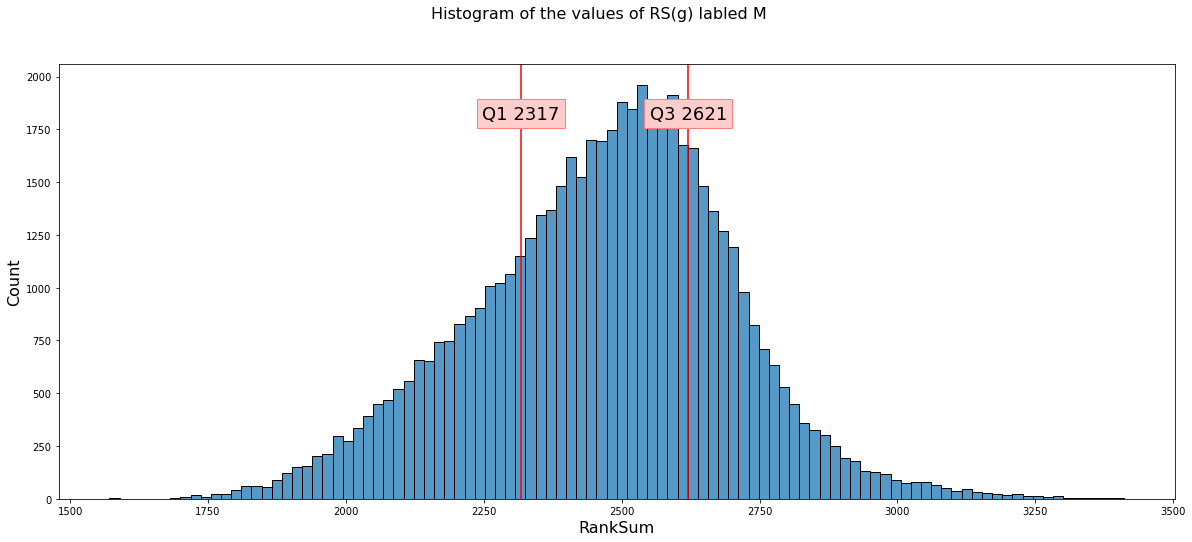

The IQR range of RS(g) is: 304.0


In [4]:
#5, takes about 1 min to run
rs_g = []
for i in range (2,54630):
    ranks = data.iloc[:,i].rank()
    ranksum = 0
    for j in range (0,99):
        if data.iloc[j,0]=='M' :
            ranksum+=ranks[j+1]
    rs_g.append(ranksum)
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("Histogram of the values of RS(g) labled M", fontsize=16)
sns.histplot(x=rs_g, ax=ax, bins=100, legend=True)
ax.set_xlabel('RankSum', size=16)
ax.set_ylabel('Count', size=16)
q1, q3 = np.percentile(rs_g, [25 ,75])
plt.axvline(q1, color='r')
plt.axvline(q3, color='r')
plt.text(q1,1800,'Q1 2317',fontsize=18,horizontalalignment='center',
        bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.text(q3,1800,'Q3 2621',fontsize=18,horizontalalignment='center',
        bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.show()
print("The IQR range of RS(g) is: {}".format(stats.iqr(rs_g)))

#### C. High level description of the data and some pre-processing

The purpose is to determine the statistical significance of 
differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene, 
using both Student t-test and WRS test. 
Report the number of genes overexpressed in M vs H (M > H) at 
a p-value better (≤) than 0.07 and separately genes 
underexpressed in M vs H (M < H) at a p-value better than 0.07. 
For both directions use both a Student t-test and a WRS test.

In [5]:
def GetNumberOfSignificantTests(testName, alpha):
    testData =  np.sort(all_pvals[testName].values)
    return len(testData[testData <= alpha])
# read the p-values data from csv:
all_pvals = pd.read_csv('pvals_collab_all.csv')
# report 
alpha = 0.07
print(f'Underexpressed genes with p-value<={alpha}   WRS : {GetNumberOfSignificantTests("wrs_underExp", alpha)}, T-test : {GetNumberOfSignificantTests("ttest_underExp", alpha)} ')
print(f'Overexpressed genes with p-value<={alpha}   WRS : {GetNumberOfSignificantTests("wrs_overExp", alpha)}, T-test : {GetNumberOfSignificantTests("ttest_overExp", alpha)}')

Underexpressed genes with p-value<=0.07   WRS : 10667, T-test : 8639 
Overexpressed genes with p-value<=0.07   WRS : 10787, T-test : 8517


#### D. Correlations
Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in 3c. Generate a set of 160 
genes, D, which is the union of the above two sets.
1) Compute Kendall 𝜏 correlations in all pairs within D (160 
choose 2 numbers). Represent the correlation matrix as a 160x160 
heatmap. 

2) Under a NULL model that assumes that genes are pairwise 
independent, what is the expected value for 𝜏? 

3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs 
from the overexpressed genes in D. Present your results on a 
histogram. What is the average value you observed? 
Compare it to the value in the above section. Explain.

4) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression 
levels of genes, across a set of samples)?

5) What can you say about how many co-expressed pairs we 
would observe (in the entire dataset) at FDR=0.05? Explain 
your answer.

6) What would have been advantages and disadvantages of 
computing co-expression for all genes in the study rather than 
only for genes in D?

In [6]:
#create D
wrs_under_genes = all_pvals[["Gene", "wrs_underExp"]]
wrs_under_genes = wrs_under_genes.sort_values(by=["wrs_underExp"],ascending=True)
wrs_over_genes = all_pvals[["Gene", "wrs_overExp"]]
wrs_over_genes = wrs_over_genes.sort_values(by=["wrs_overExp"],ascending=True)
most_sig = wrs_under_genes.iloc[:80,0]
most_sig = most_sig.append(wrs_over_genes.iloc[:80,0])
most_sig = most_sig.tolist()
D = data[most_sig]
D = D.astype(float)

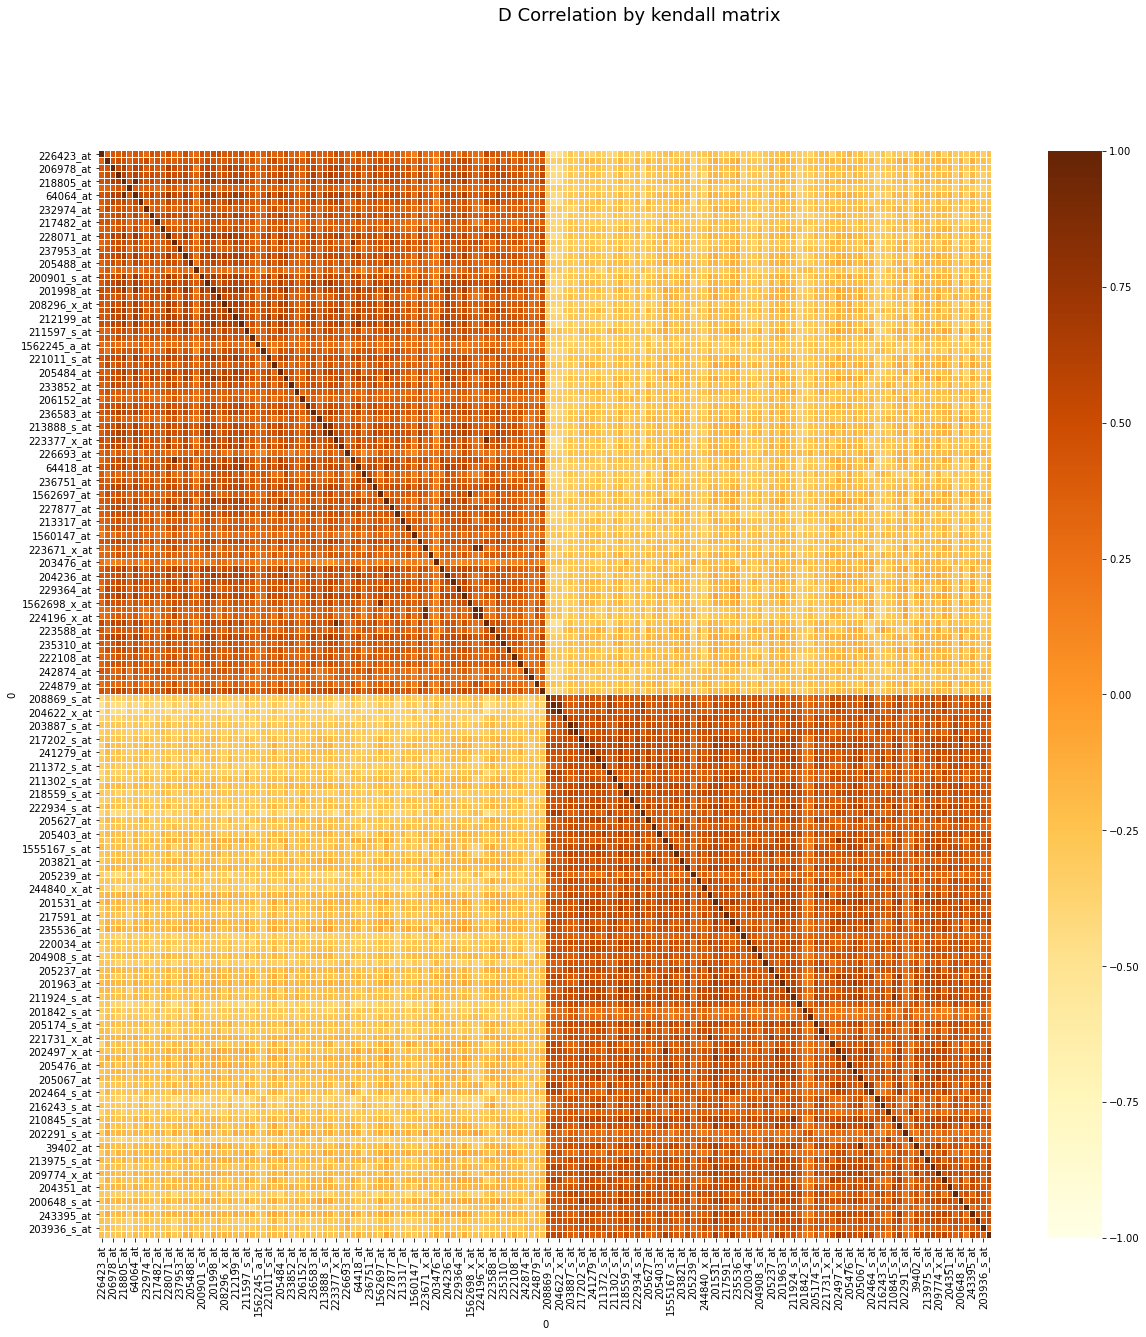

In [7]:
#1
fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle('D Correlation by kendall matrix', fontsize=18)
sns.heatmap(D.corr(method='kendall'), ax=ax, center=0, linewidths=0.01, vmin=-1, vmax=1, cmap="YlOrBr")
plt.show()

2)Under a Null model assuming all genes are pairwise independant, we should expect to see random correlations.

Therefore We expect Correlations to be uniformly distributed over the space [-1,1] with a mean if 0.

$τ(x,y)\sim U[-1,1]$

$E(τ(x,y)))=0$

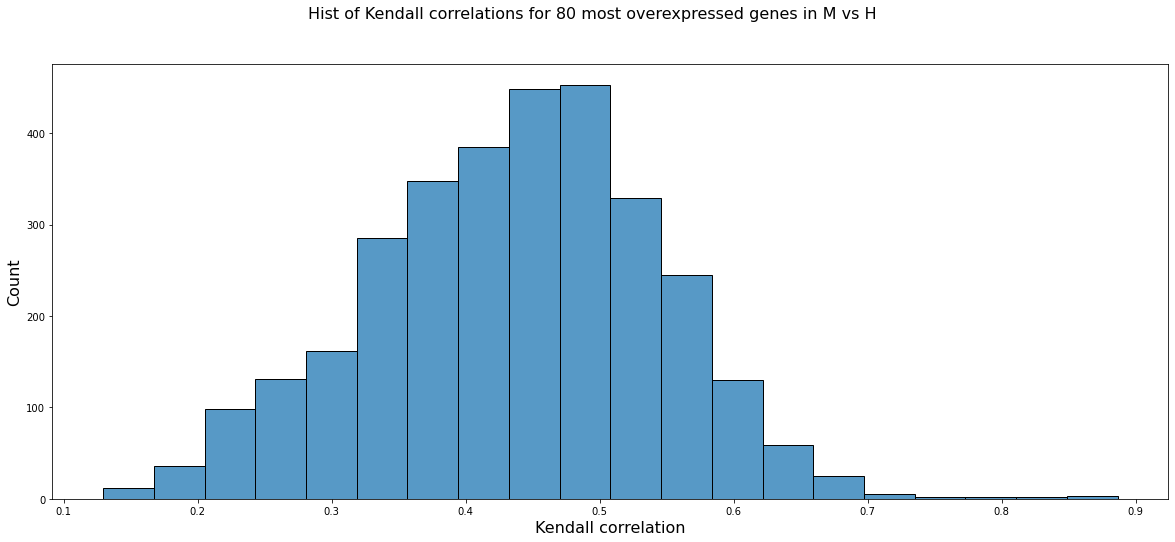

The average kendall correlation observed is : 0.4363337551144901
The value being different from 0 can be explained in 2 ways:
 1. There aren't enough observations.
    We are only observing 80 chose 2 correlations as oppose to the entire dataset of 54628 chose 2.
 2. They are not pairwise independant.


In [8]:
#3
df_over = D.iloc[:,80:]
df_over = df_over.astype(float)
kendall_corrs = []
for k in range(80):
    j=k+1
    while j<80:
        x = df_over.iloc[:,k]
        y = df_over.iloc[:,j]
        kendall_corrs.append(stats.kendalltau(x,y)[0])
        j+=1
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("Hist of Kendall correlations for 80 most overexpressed genes in M vs H", fontsize=16)
sns.histplot(x=kendall_corrs, ax=ax, bins=20, legend=True)
ax.set_xlabel('Kendall correlation', size=16)
ax.set_ylabel('Count', size=16)
plt.show()
average_kendall = sum(kendall_corrs)/len(kendall_corrs)
print("The average kendall correlation observed is : {}".format(average_kendall))
print("The value being different from 0 can be explained in 2 ways:")
print(" 1. There aren't enough observations.\n    We are only observing 80 chose 2 correlations as oppose to the entire dataset of 54628 chose 2.")
print(" 2. They are not pairwise independant.")

In [ ]:
#4 
#first lets view how many pairs of genes co-express within D. 
#Since co-expression is'nt defined, we created a dataFrame showing the amount of pairs passing a threshold of correlation with p-value better than 0.07.
def co_expression (df,threshold,pvalue):
    count=0
    for k in range(0,len(df.iloc[0])-2):
        j=k+1
        while j<len(df.iloc[0]):
            x = df.iloc[:,k]
            y = df.iloc[:,j]
            corr,p = stats.spearmanr(x, y)
            if (corr>threshold and p<pvalue):
                count+=1
            j+=1
    return count
d_co = [co_expression(D,i,0.07) for i in [0.5,0.6,0.7,0.8,0.9]]
d_o_co = [co_expression(df_over,i,0.07) for i in [0.5,0.6,0.7,0.8,0.9]]
df_under = D.iloc[:,:80]
df_under = df_under.astype(float)
d_u_co = [co_expression(df_under,i,0.07) for i in [0.5,0.6,0.7,0.8,0.9]]
df_co = pd.DataFrame ({'Treshold':['0.5','0.6','0.7','0.8','0.9'],
                       'All genes':d_co,
                       'In overexpressed':d_o_co,
                       'In underexpressed':d_u_co})

In [ ]:
df_co

In [ ]:
#Next we calculated FDR=0.05 to get a sence of how significant the results are.
def ReportFDR(pvals, requiredFdr, testName):
    for i in range (len(pvals)):
        fdr = CalculateFdr(i + 1, pvals[i], len(pvals))
        if (fdr > requiredFdr):
            print(f'[{testName}] {i-1} features can be reported with FDR of {requiredFdr}')
            break
def CalculateFdr(i, pvalue, evaluations):
    return (pvalue * evaluations ) / i

def GetCorrelationPvalues(df):
    cols = len(df.columns)
    pvals = []
    for i in range(0, cols):
        for j in range(i+1, cols):
            x = df.iloc[:,i]
            y = df.iloc[:,j]
            cor,p = stats.pearsonr(x, y)
            pvals.append(p)
    pvals.sort()
    return pvals

correlationPvals = GetCorrelationPvalues(D)
ReportFDR(correlationPvals, 0.05, "co-expression of genes in D")

4)To conclude:
We observe Co-expression between all genes in D, wich are slightly more common among underexpressed genes.
FDR=0.05 yeilded a substantial result.
Under a null model assuming genes are pairwise independant we would expect FDR(10559)~0.83, thus our report is significant with a low false detection rate.

5) Observing co-expressed pairs with FDR=0.05 in the entire dataset could yeild completely different results.
We cannot inffer how many co-expressed pairs we would observe in the entire dataset. 
On one hand there might be pairs of genes with strong correlations which are not in D. 
On the other hand our low FDR results could be mitigated over the large number of testing. 
Either way we should expect to view at least $0.05*{N_{genes} \choose 2}$ as this is the margin of error expected. 

6)Advantages: 
1. Accuracy. We could possibly find pairs of genes wich co-express that are not in D. Screening the Data to a select group could yeild a false representation.

Disadvantages:
1. Greater data volumes require more careful inferential statistics approaches (Bonferroni correction, Report FDR results etc).

2. computation time. We would need to compute 54630 chose 2 correlations. We would also expect to find more false-positive results that would need correction by FDR that will require even more computing time.

#### E. Plots and Conclusions of the DE and correlation analysis

1) Construct the DE overabundance plots (blue and green lines
as shown in class) for M vs H overexpression (higher 
expression levels in M) using WRS and t-test using the results 
you had computed in Section 3c.
State, for each comparison, the number of genes, k, at which 
we observe:

a) FDR = 0.05

b) FDR = 0.01

c) FDR = 0.005

If these events are not observed at any k>0, then make that 
statement.

In [ ]:
def plotGraph(pvals, header):
    x = np.linspace(0, 1, 100)
    expected = x * 54630
    actual = [np.count_nonzero(pvals < i, axis=0) for i in x]

    y = pd.concat([pd.DataFrame(data={"value" : expected, "x" : x}), pd.DataFrame(data={"value" : actual, "x" : x})], axis=0, keys=['expected', 'actual']).reset_index()
    y = y.rename(columns={'level_0': 'Class'})
    c = sns.lineplot(data=y, x='x', y='value', hue='Class', palette=['b', 'g'], linewidth=2.5).set_title(header)

# extract the p-values of the wrs and ttest over-expression tests
pvalues_data = pd.read_csv('pvals_collab_all.csv')
wrs_overExp = np.sort(pvalues_data['wrs_overExp'].values)
ttest_overExp= np.sort(pvalues_data['ttest_overExp'].values) 

plotGraph(wrs_overExp, "wrs")

In [ ]:
plotGraph(ttest_overExp, "t-test")

In [ ]:
def ReportFDR(pvals, requiredFdr, testName):
    
    for i in range (len(pvals)):
        fdr = CalculateFdr(i + 1, pvals[i], len(pvals))
        if (fdr > requiredFdr):
            print(f'[{testName}] {i-1} features can be reported with FDR of {requiredFdr}')
            break;

def CalculateFdr(i, pvalue, evaluations):
    return (pvalue * evaluations ) / i;

ReportFDR(wrs_overExp, 0.05, "WRS")
ReportFDR(wrs_overExp, 0.01, "WRS")
ReportFDR(wrs_overExp, 0.005, "WRS")
print("---------------------------------------------------------")
ReportFDR(ttest_overExp, 0.05, "T-Test")
ReportFDR(ttest_overExp, 0.01, "T-Test")
ReportFDR(ttest_overExp, 0.005, "T-Test")

2) Select any 3 differentially expressed genes, from D (which 
was defined in 3d), and produce a graphical representation of 
their expression patterns that demonstrates the observed DE.

In [ ]:
def GetMostSignificantGenesByTest(size, test):
    return  [pvalues_data[['Gene', test]].sort_values(by=[test]).iloc[i]["Gene"] for i in range(size)]

significantGenes = GetMostSignificantGenesByTest(3, "wrs_overExp")
significantGenes = [data.columns.get_loc(gene) for gene in significantGenes]

PlotGenesExpresionLevel(significantGenes)

3) Heatmap

Draw a heatmap representation of the expression values of 
the genes in D (from 3d), across the entire cohort (all 
samples). Order the genes and the samples to produce the 
maximal visual effect.

In [ ]:
over = GetMostSignificantGenesByTest(80, "wrs_overExp")
under = GetMostSignificantGenesByTest(80, "wrs_underExp")
D = data[np.concatenate((np.array(["Class"]), over, under), axis=0)].sort_values(by=["Class"]).drop(["Class"], axis=1).astype(float)

_ = sns.heatmap(D, annot=False, xticklabels=False, yticklabels=False).set_title('Gene expression')
_ = plt.xlabel('Genes', fontsize = 15)
_ = plt.ylabel('Patients', fontsize = 15)